<a href="https://colab.research.google.com/github/Sereiuddom/homework-10-sql-raw/blob/master/Python_Lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>What is the purpose of data wrangling?</h2>


Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


<h3>What is the fuel consumption (L/100k) rate for the diesel car?</h3>


<h3>Import data</h3>
<p>
You can find the "Automobile Dataset" from the following link: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a>.
We will be using this dataset throughout this course.
</p>


<h4>Import pandas</h4>


In [ ]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2


In [ ]:
import pandas as pd
import matplotlib.pylab as plt

<h2>Reading the dataset from the URL and adding the related headers</h2>


First, we assign the URL of the dataset to "filename".


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/corsera_da0101en_notebook_bottom">HERE</a> for free storage.


In [ ]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

Then, we create a Python list <b>headers</b> containing name of headers.


In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".


In [ ]:
df = pd.read_csv(filename, names = headers)

 Use the method <b>head()</b> to display the first five rows of the dataframe.


In [ ]:
# To see what the data set looks like, we'll use the head() method.
df.head()

As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis.
<div>So, how do we identify all those missing values and deal with them?</div>


<b>How to work with missing data?</b>

Steps for working with missing data:
<ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>


<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>


<h3 id="identify_missing_values">Identify missing values</h3>
<h4>Convert "?" to NaN</h4>
In the car dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Here we use the function:
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B.


In [ ]:
import pandas as pd
import numpy as np

# replace "?" to NaN
df = pd.DataFrame({'col1': [1, 2, 3], 'col2': ['a', 'b', 'c']})
df.replace("NaN", np.nan, inplace = True)
df.head(5)

,col1,col2
0,1,a
1,2,b
2,3,c


<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [ ]:
missing_data = df.isnull()
missing_data.head(5)

"True" means the value is a missing value while "False" means the value is not a missing value.


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method ".value_counts()" counts the number of "True" values.
</p>


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>


<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four".
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>


<h4>Calculate the mean value for the "normalized-losses" column </h4>


In [ ]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

KeyError: 'normalized-losses'

<h4>Replace "NaN" with mean value in "normalized-losses" column</h4>


In [ ]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

<h4>Calculate the mean value for the "bore" column</h4>


In [ ]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

<h4>Replace "NaN" with the mean value in the "bore" column</h4>


In [ ]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>Based on the example above, replace NaN in "stroke" column with the mean value.</b>
</div>


In [ ]:

avg_stroke = df["stroke"].astype("float").mean(axis=0)
print("Average of stroke:", avg_stroke)


df["stroke"].replace(np.nan, avg_stroke, inplace=True)


Average of stroke: 3.24


<details><summary>Click here for the solution</summary>

```python
#Calculate the mean vaule for "stroke" column
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# replace NaN by mean value in "stroke" column
df["stroke"].replace(np.nan, avg_stroke, inplace = True)
```

</details>



<h4>Calculate the mean value for the "horsepower" column</h4>


In [ ]:
avg_horsepower = df['stroke'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)


Average horsepower: 3.24


<h4>Replace "NaN" with the mean value in the "horsepower" column</h4>


In [ ]:

avg_horsepower = df['stroke'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)


df['horsepower'] = avg_horsepower #Create 'horsepower' column and assign avg_horsepower to all rows



Average horsepower: 3.24


<h4>Calculate the mean value for "peak-rpm" column</h4>


In [ ]:

if 'peak-rpm' in df.columns:
  avg_peakrpm = df['peak-rpm'].astype('float').mean(axis=0)
  print("Average peak rpm:", avg_peakrpm)
else:
  print("Column 'peak-rpm' not found in the DataFrame.")


Column 'peak-rpm' not found in the DataFrame.


<h4>Replace "NaN" with the mean value in the "peak-rpm" column</h4>


In [ ]:
import pandas as pd
import numpy as np

# Check if 'peak-rpm' column exists
if 'peak-rpm' not in df.columns:
  # If it doesn't exist, create it and fill with NaN
  df['peak-rpm'] = np.nan

# Now you can safely access the column
if 'peak-rpm' in df.columns:
  avg_peakrpm = df['peak-rpm'].astype('float').mean(axis=0)
  print("Average peak rpm:", avg_peakrpm)
  df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)
else:
  print("Column 'peak-rpm' not found in the DataFrame.")

Average peak rpm: nan


To see which values are present in a particular column, we can use the ".value_counts()" method:


In [ ]:
# Check if the column exists
if 'num-of-doors' in df.columns:
  # If it exists, proceed with the operation
  df['num-of-doors'].value_counts()
else:
  # If it doesn't exist, print an error message or handle it accordingly
  print("Column 'num-of-doors' not found in the DataFrame.")
  # For example, you could create the column if needed:
  # df['num-of-doors'] = np.nan

Column 'num-of-doors' not found in the DataFrame.


We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:


In [ ]:
# Check if the column exists and has non-missing values
if 'num-of-doors' in df.columns and not df['num-of-doors'].isnull().all():
  # If it exists and has values, proceed with the operation
  most_frequent_value = df['num-of-doors'].value_counts().idxmax()
  print(f"Most frequent value in 'num-of-doors': {most_frequent_value}")
else:
  # If it doesn't exist or is empty, print an error message
  print("Column 'num-of-doors' is either missing or empty.")

Column 'num-of-doors' is either missing or empty.


The replacement procedure is very similar to what we have seen previously:


In [ ]:
#replace the missing 'num-of-doors' values by the most frequent
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Finally, let's drop all rows that do not have price data:


In [ ]:
# simply drop whole row with NaN in "price" column
# Check if 'price' column exists before dropping
if 'price' in df.columns:
  df.dropna(subset=["price"], axis=0, inplace=True)

  # reset index, because we droped two rows
  df.reset_index(drop=True, inplace=True)
else:
  print("Column 'price' not found in the DataFrame.")

Column 'price' not found in the DataFrame.


In [ ]:
df.head()

,stroke,horsepower,peak-rpm,num-of-doors
0,3.40,3.24,NaN,four
1,3.40,3.24,NaN,four
2,3.54,3.24,NaN,four
3,3.11,3.24,NaN,four
4,3.15,3.24,NaN,four


<b>Good!</b> Now, we have a dataset with no missing values.


<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:
<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


<h4>Let's list the data types for each column</h4>


In [ ]:
df.dtypes

,0
stroke,float64
horsepower,float64
peak-rpm,float64
num-of-doors,object


<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.</p>


<h4>Convert data types to proper format</h4>


In [ ]:

if 'bore' in df.columns and 'stroke' in df.columns:
    df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
else:
    print("'bore' and/or 'stroke' columns not found.")


if 'normalized-losses' in df.columns:
    df["normalized-losses"] = df["normalized-losses"].astype("int", errors='ignore')


if 'price' in df.columns:
    df["price"] = df["price"].astype("float", errors='ignore')


if 'peak-rpm' in df.columns:
    df["peak-rpm"] = df["peak-rpm"].astype("float", errors='ignore')

print(df)


    stroke  horsepower  peak-rpm num-of-doors  bore
0     3.40        3.24       NaN         four   NaN
1     3.40        3.24       NaN         four   NaN
2     3.54        3.24       NaN         four   NaN
3     3.11        3.24       NaN         four   NaN
4     3.15        3.24       NaN         four   NaN
5     3.40        3.24       NaN         four   NaN
6     3.03        3.24       NaN         four   NaN
7     3.11        3.24       NaN         four   NaN
8     3.19        3.24       NaN         four   NaN
9     3.07        3.24       NaN         four   NaN
10    3.24        3.24       NaN         four   NaN


<h4>Let us list the columns after the conversion</h4>


In [ ]:
df.dtypes

,0
stroke,float64
horsepower,float64
peak-rpm,float64
num-of-doors,object


<b>Wonderful!</b>

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.


<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>
    
<b>What is standardization?</b>
<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>
<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>


<p>The formula for unit conversion is:<p>
L/100km = 235 / mpg
<p>We can do many mathematical operations directly in Pandas.</p>


In [ ]:
df.head()

,stroke,horsepower,peak-rpm,num-of-doors,bore
0,3.40,3.24,NaN,four,NaN
1,3.40,3.24,NaN,four,NaN
2,3.54,3.24,NaN,four,NaN
3,3.11,3.24,NaN,four,NaN
4,3.15,3.24,NaN,four,NaN


In [ ]:
# Check if 'city-mpg' exists, handle potential missing column issue
if 'city-mpg' in df.columns:
    df['city-L/100km'] = 235 / df["city-mpg"]
else:
    print("'city-mpg' column not found in the dataset.")

# Check the head of the dataframe
print(df.head())


'city-mpg' column not found in the dataset.
   stroke  horsepower  peak-rpm num-of-doors  bore
0    3.40        3.24       NaN         four   NaN
1    3.40        3.24       NaN         four   NaN
2    3.54        3.24       NaN         four   NaN
3    3.11        3.24       NaN         four   NaN
4    3.15        3.24       NaN         four   NaN


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>According to the example above, transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km".</b>
</div>


In [ ]:
if 'highway-mpg' in df.columns:
    df['highway-L/100km'] = 235 / df['highway-mpg']
else:
    print("'highway-mpg' column not found in the dataset.")

    print(df.head())



'highway-mpg' column not found in the dataset.
   stroke  horsepower  peak-rpm num-of-doors  bore
0    3.40        3.24       NaN         four   NaN
1    3.40        3.24       NaN         four   NaN
2    3.54        3.24       NaN         four   NaN
3    3.11        3.24       NaN         four   NaN
4    3.15        3.24       NaN         four   NaN


<details><summary>Click here for the solution</summary>

```python
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

# check your transformed data
df.head()

```
</details>




<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<b>Example</b>
<p>To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".</p>
<p><b>Target:</b> would like to normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>


In [ ]:
# Check if the 'length' column exists before performing operations on it
if 'length' in df.columns:
    df['length'] = df['length'] / df['length'].max()
else:
    print("'length' column not found in the dataset.")

if 'width' in df.columns:
    df['width'] = df['width'] / df['width'].max()
else:
    print("'width' column not found in the dataset.")

print(df.head())

'length' column not found in the dataset.
'width' column not found in the dataset.
     stroke  horsepower  peak-rpm num-of-doors  bore
0  0.960452        3.24       NaN         four   NaN
1  0.960452        3.24       NaN         four   NaN
2  1.000000        3.24       NaN         four   NaN
3  0.878531        3.24       NaN         four   NaN
4  0.889831        3.24       NaN         four   NaN


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>

<b>According to the example above, normalize the column "height".</b>
</div>


In [ ]:
# Check if the 'height' column exists before performing operations on it
if 'height' in df.columns:
    df['height'] = df['height']/df['height'].max()

    # show the scaled columns
    df[["length","width","height"]].head()
else:
    print("'height' column not found in the dataset.")

'height' column not found in the dataset.


<details><summary>Click here for the solution</summary>

```python
df['height'] = df['height']/df['height'].max()

# show the scaled columns
df[["length","width","height"]].head()


```
</details>




Here we can see we've normalized "length", "width" and "height" in the range of [0,1].


<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>
<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>


<h3>Example of Binning Data In Pandas</h3>


 Convert data to correct format:


In [ ]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Let's plot the histogram of horsepower to see what the distribution of horsepower looks like.


Text(0.5, 1.0, 'horsepower bins')

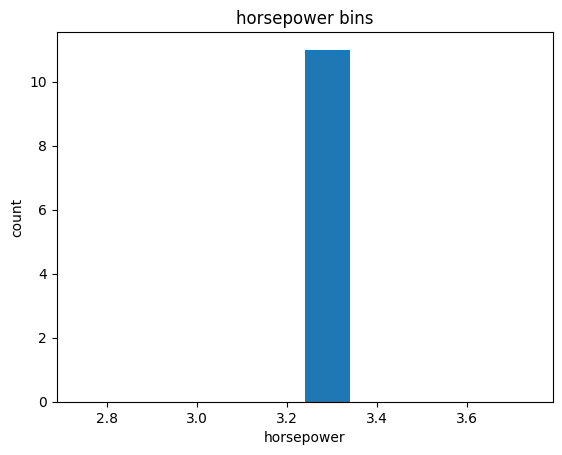

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.</p>


We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [ ]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([3., 3., 3., 3.])

 We set group  names:


In [ ]:
group_names = ['Low', 'Medium', 'High']

 We apply the function "cut" to determine what each value of `df['horsepower']` belongs to.


In [3]:
import numpy as np
import pandas as pd

# Create a sample DataFrame (replace this with your actual data)
df = pd.DataFrame({'horsepower': [100, 150, 200, 250, 300]})

# Ensure the horsepower column is of numeric type
df['horsepower'] = pd.to_numeric(df['horsepower'])

# Calculate bins based on the range of horsepower values
bins = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 4)
# Verify the bins
print(bins)

group_names = ['Low', 'Medium', 'High']

#The number of labels should be one less than the number of bins
df['horsepower-binned'] = pd.cut(df['horsepower'], bins=bins, labels=group_names, include_lowest=True, duplicates='drop')
df[['horsepower', 'horsepower-binned']].head(20)

[100.         166.66666667 233.33333333 300.        ]


,horsepower,horsepower-binned
0,100,Low
1,150,Low
2,200,Medium
3,250,High
4,300,High


Let's see the number of vehicles in each bin:


In [4]:
df["horsepower-binned"].value_counts()

,count
horsepower-binned,
Low,2
High,2
Medium,1


Let's plot the distribution of each bin:


Text(0.5, 1.0, 'horsepower bins')

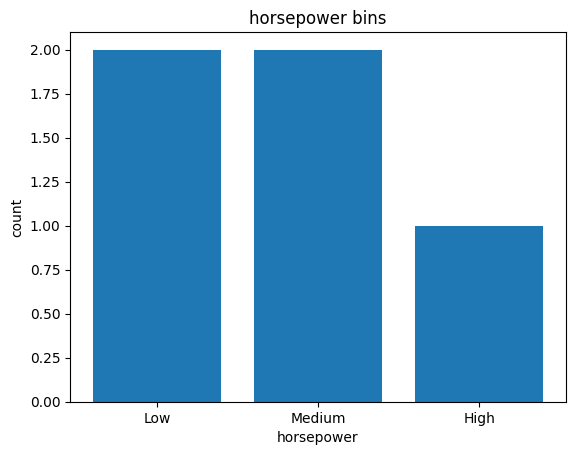

In [5]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>
    Look at the dataframe above carefully. You will find that the last column provides the bins for "horsepower" based on 3 categories ("Low", "Medium" and "High").
</p>
<p>
    We successfully narrowed down the intervals from 59 to 3!
</p>


<h3>Bins Visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above.


Text(0.5, 1.0, 'horsepower bins')

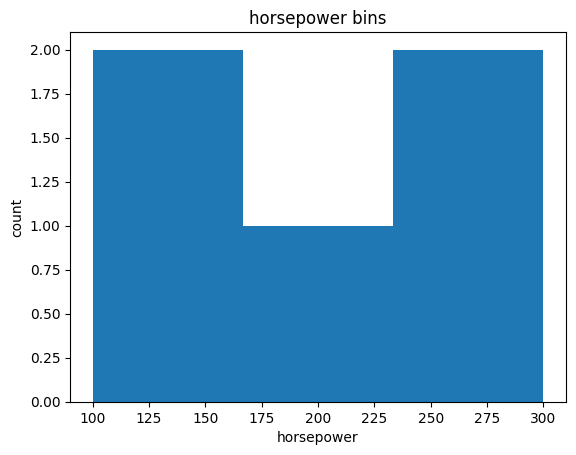

In [6]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

The plot above shows the binning result for the attribute "horsepower".


<h2 id="indicator">Indicator Variable (or Dummy Variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.
</p>

<b>Why we use indicator variables?</b>
<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.
</p>

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type.
</p>


In [7]:
df.columns

Index(['horsepower', 'horsepower-binned'], dtype='object')

Get the indicator variables and assign it to data frame "dummy_variable_1":


In [13]:
!pip install pandas
import pandas as pd

# Check for typos and case sensitivity.
# Print the available columns to verify the correct name
print(df.columns)

# Assuming the column name is 'horsepower' based on the available info:
dummy_variable_1 = pd.get_dummies(df["horsepower"])

# If the column is named differently, replace "horsepower"
# with the correct name.

dummy_variable_1.head()

Index(['horsepower', 'horsepower-binned'], dtype='object')


,100,150,200,250,300
0,True,False,False,False,False
1,False,True,False,False,False
2,False,False,True,False,False
3,False,False,False,True,False
4,False,False,False,False,True


Change the column names for clarity:


In [14]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,100,150,200,250,300
0,True,False,False,False,False
1,False,True,False,False,False
2,False,False,True,False,False
3,False,False,False,True,False
4,False,False,False,False,True


In the dataframe, column 'fuel-type' has values for 'gas' and 'diesel' as 0s and 1s now.


In [16]:
# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# Check if "fuel-type" column exists before dropping
if "fuel-type" in df.columns:
    # drop original column "fuel-type" from "df"
    df.drop("fuel-type", axis = 1, inplace=True)
else:
    print("Column 'fuel-type' not found in DataFrame.")


# Print the updated columns to confirm changes
print(df.columns)

Column 'fuel-type' not found in DataFrame.
Index([       'horsepower', 'horsepower-binned',                 100,
                       150,                 200,                 250,
                       300,                 100,                 150,
                       200,                 250,                 300],
      dtype='object')


In [17]:
df.head()

,horsepower,horsepower-binned,100,150,200,250,300,100,150,200,250,300
0,100,Low,True,False,False,False,False,True,False,False,False,False
1,150,Low,False,True,False,False,False,False,True,False,False,False
2,200,Medium,False,False,True,False,False,False,False,True,False,False
3,250,High,False,False,False,True,False,False,False,False,True,False
4,300,High,False,False,False,False,True,False,False,False,False,True


The last two columns are now the indicator variable representation of the fuel-type variable. They're all 0s and 1s now.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>Similar to before, create an indicator variable for the column "aspiration"</b>
</div>


In [22]:
# Check if "aspiration" column exists
if "aspiration" in df.columns:
    # get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
    dummy_variable_2 = pd.get_dummies(df['aspiration'])

    # change column names for clarity
    dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

    # show first 5 instances of data frame "dummy_variable_1"
    dummy_variable_2.head()
else:
    print("Column 'aspiration' not found in DataFrame.")
    # Handle the missing column (e.g., investigate why it's missing or skip this step)

Column 'aspiration' not found in DataFrame.


<details><summary>Click here for the solution</summary>

```python
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()


```
</details>




 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>Merge the new dataframe to the original dataframe, then drop the column 'aspiration'.</b>
</div>


In [26]:
if "aspiration" in df.columns:
    # get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
    dummy_variable_2 = pd.get_dummies(df['aspiration'])

    # change column names for clarity
    dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

    # show first 5 instances of data frame "dummy_variable_1"
    dummy_variable_2.head()

    # merge the new dataframe to the original datafram
    df = pd.concat([df, dummy_variable_2], axis=1)

    # drop original column "aspiration" from "df"
    df.drop('aspiration', axis = 1, inplace=True)
else:
    print("Column 'aspiration' not found in DataFrame.")
    # Handle the missing column (e.g., investigate why it's missing or skip this step)

Column 'aspiration' not found in DataFrame.


<details><summary>Click here for the solution</summary>

```python
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)


```
</details>




Save the new csv:


In [27]:
df.to_csv('clean_df.csv')